In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/karlevans/Documents/Data Science'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/Users/karlevans/Documents/Data Science/titanicversion1-0.ipynb
/Users/karlevans/Documents/Data Science/get-pip.py
/Users/karlevans/Documents/Data Science/Data Science.code-workspace
/Users/karlevans/Documents/Data Science/data-2.csv
/Users/karlevans/Documents/Data Science/Tree Regression.ipynb
/Users/karlevans/Documents/Data Science/GIS.ipynb
/Users/karlevans/Documents/Data Science/IOLStudy.qmd
/Users/karlevans/Documents/Data Science/possum.csv
/Users/karlevans/Documents/Data Science/Example1.jl
/Users/karlevans/Documents/Data Science/pracexam1.py
/Users/karlevans/Documents/Data Science/1Class.ipynb
/Users/karlevans/Documents/Data Science/NeuralNetworkExample.R
/Users/karlevans/Documents/Data Science/.venv/pyvenv.cfg
/Users/karlevans/Documents/Data Science/.venv/.gitignore
/Users/karlevans/Documents/Data Science/.venv/bin/jupyter-run
/Users/karlevans/Documents/Data Science/.venv/bin/Activate.ps1
/Users/karlevans/Documents/Data Science/.venv/bin/python3
/Users/karlevans/Documents/Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
example_submission=pd.read_csv("/Users/karlevans/Documents/Data Science/titanic/gender_submission.csv")
test_data=pd.read_csv("/Users/karlevans/Documents/Data Science/titanic/test.csv")
train_data=pd.read_csv("/Users/karlevans/Documents/Data Science/titanic/train.csv")


In [40]:
example_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [41]:
train_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [ ]:
train_data.info()
train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_data.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

# EDA

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Numeric

Pclass, age, Sibsp, Parch, fare, Ticket

<Axes: xlabel='Survived', ylabel='Age'>

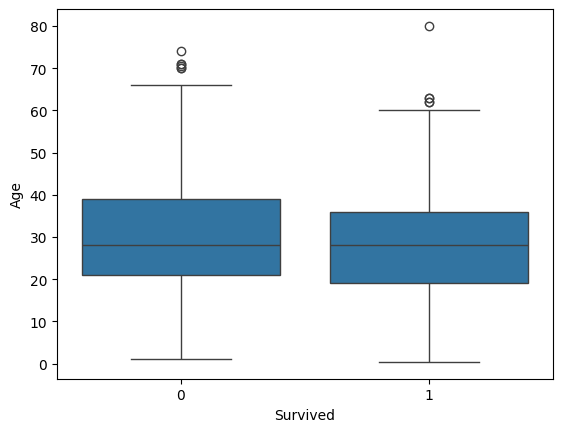

In [44]:
sns.boxplot(y="Age",x="Survived", data=train_data)

<Axes: xlabel='Age', ylabel='Count'>

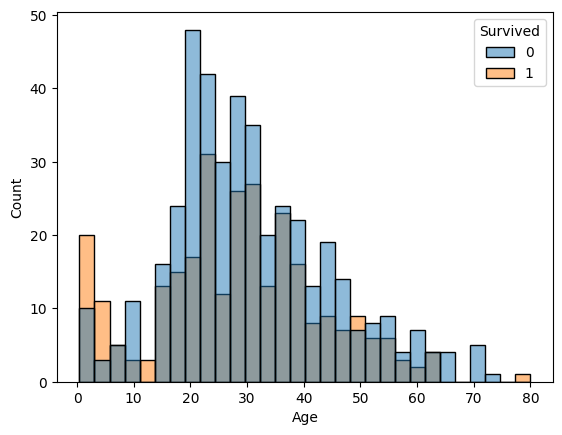

In [48]:
sns.histplot(x="Age",hue="Survived", bins=30, data=train_data)

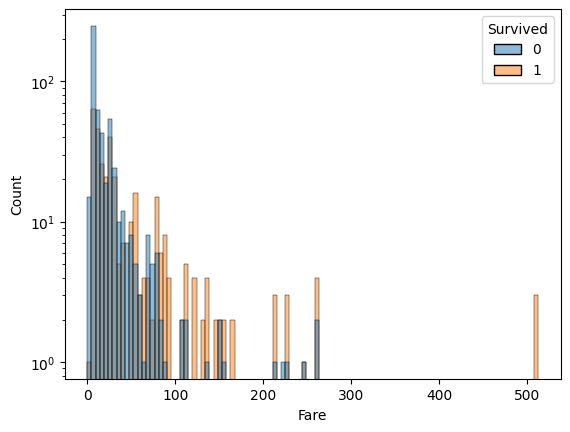

In [17]:
sns.histplot(x="Fare",hue="Survived", data=train_data).set_yscale('log')

<Axes: xlabel='SibSp', ylabel='Count'>

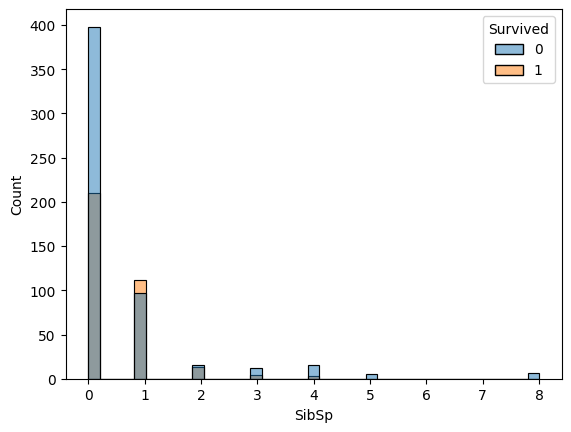

In [15]:
sns.histplot(x="SibSp",hue="Survived",data=train_data)#.set_xscale('log')


<Axes: xlabel='Parch', ylabel='Count'>

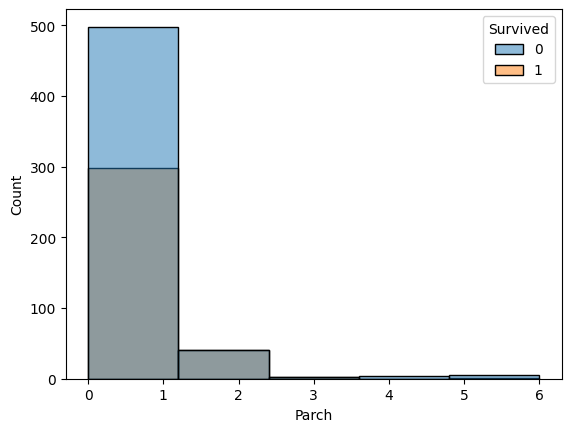

In [18]:
sns.histplot(x="Parch",hue="Survived",bins =5,data=train_data)#.set_xscale('log')

<Axes: xlabel='Pclass', ylabel='Count'>

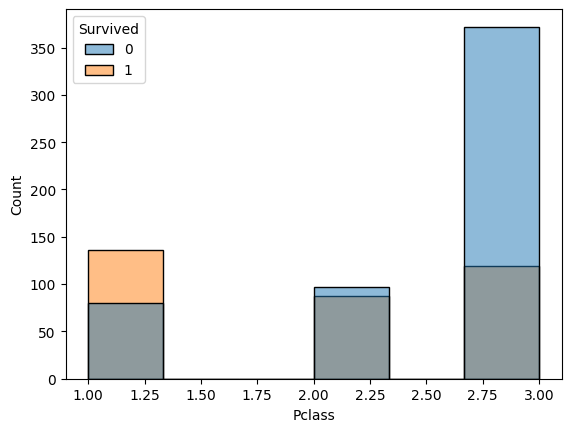

In [20]:
sns.histplot(x="Pclass",hue="Survived",bins=6,data=train_data)#.set_xscale('log')

## 2. Categorical

name, sex, embarked, cabin

<Axes: xlabel='Sex', ylabel='count'>

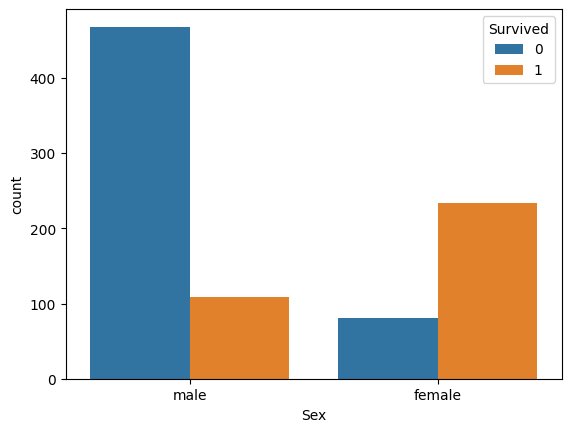

In [21]:
sns.countplot(x="Sex",hue="Survived", data=train_data)

<Axes: xlabel='Embarked', ylabel='count'>

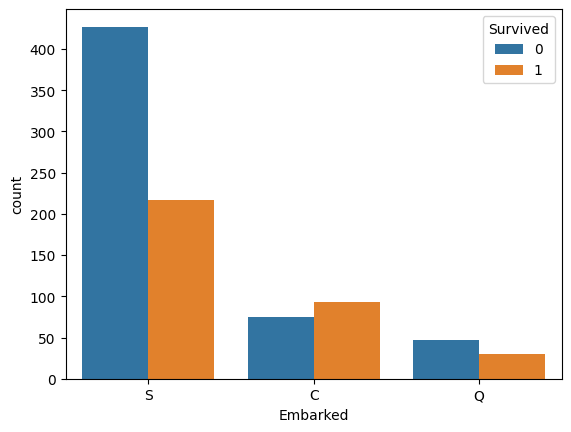

In [22]:
sns.countplot(x="Embarked",hue="Survived", data=train_data)

In [34]:
train_data.Cabin.head(20)
#sns.countplot(x="Embarked",hue="Survived", data=train_data)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [36]:
train_data.Name.head(20)
#sns.countplot(x="Name",hue="Survived", data=train_data)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [9]:
new = train_data["Ticket"].str.split(" ", n=1, expand=True)

# making separate first name column from new data frame
train_data["Ticket1"] = new[0]

# making separate last name column from new data frame
train_data["Ticket2"] = new[1]
train_data['coalesce'] = train_data[['Ticket2', 'Ticket1']].bfill(axis=1).iloc[:, 0]
train_data['coalesce'] = pd.to_numeric(train_data['coalesce'], downcast='integer', errors='coerce')
train_data['coalesce'].head(20)
#sns.histplot(x="coalesce",hue="Survived", bins=20,data=train_data)
#sns.countplot(x="Ticket",hue="Survived", data=train_data)

0       21171.0
1       17599.0
2     3101282.0
3      113803.0
4      373450.0
5      330877.0
6       17463.0
7      349909.0
8      347742.0
9      237736.0
10       9549.0
11     113783.0
12       2151.0
13     347082.0
14     350406.0
15     248706.0
16     382652.0
17     244373.0
18     345763.0
19       2649.0
Name: coalesce, dtype: float64

In [29]:
train_data['coalesce'].head(20)

0       21171.0
1       17599.0
2     3101282.0
3      113803.0
4      373450.0
5      330877.0
6       17463.0
7      349909.0
8      347742.0
9      237736.0
10       9549.0
11     113783.0
12       2151.0
13     347082.0
14     350406.0
15     248706.0
16     382652.0
17     244373.0
18     345763.0
19       2649.0
Name: coalesce, dtype: float64

<Axes: xlabel='coalesce', ylabel='Count'>

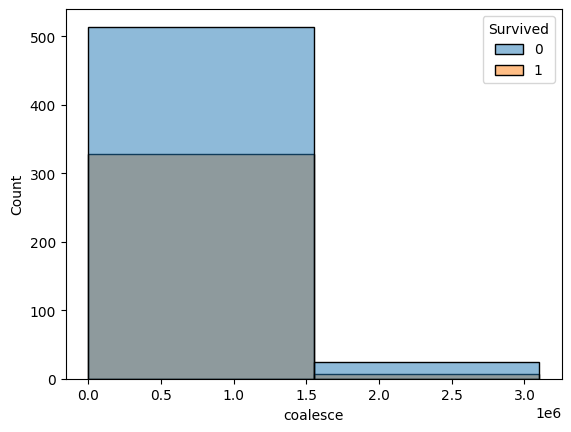

In [37]:
#train_data[train_data["Survived"]==1]
sns.histplot(x="coalesce",hue='Survived',bins=2,data=train_data)#.set_xscale('log')

In [ ]:
sns.histplot(x="Cabin",hue='Survived',bins=2,data=train_data)

# Processing

In [ ]:
# All features:Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
ignore_features=['Survived','PassengerId', 'Name']
cat_col = [col for col, type in train_data.dtypes.items() if type in ["category", 'object']and col not in ignore_features]
num_col = [col for col, type in train_data.dtypes.items() if type in ['float', 'int64']and col not in ignore_features]
features = num_col + cat_col

X=train_data.drop(ignore_features, axis=1)
X_test=test_data.drop('PassengerId', axis=1)
#train_data['Survived'] = np.where(df['target'] == "target", 1, 0)
y= train_data['Survived'].values

In [43]:
FEATURES=[cat_col,num_col]

# Data Pipeline

In [ ]:
from typing import List
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model
from sklearn import svm
import lightgbm as lgb
#from xgboost import XGBClassifier

def build_pipeline(num_features: List[str], cat_features: List[str]) -> Pipeline:
    """Full pipeline

    This function constructs the whole pipeline for training

    Params:
        config (Dict): Config content from yaml
        num_features (List[str]): List of numeric features
        cat_features (List[str]): List of categorial feature

    Returns:
        Pipeline that contians pre-process, sampling (If specified) and model

    Note:
        * Config assumes we're in the `pipeline` level already
    """
    numeric_transformer = make_pipeline(SimpleImputer(strategy='mean'),
                                       StandardScaler())

    categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'),
        #SimpleImputer(strategy='constant', fill_value='missing'),
        #IterativeImputer(max_iter=10, random_state=0),
        OneHotEncoder(handle_unknown='ignore', min_frequency=0.05)
        )

    preprocessor = make_column_transformer((numeric_transformer, num_features),
        (categorical_transformer, cat_features),
        remainder="passthrough")
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', #linear_model.LogisticRegression()
         #svm.SVC()
         lgb.LGBMClassifier()
         #XGBClassifier()
         )
    ])
    return pipe

pipeline = build_pipeline(num_features=num_col, cat_features=cat_col)

If you give np.nan to LGBM, then at each tree node split, it will split the non-NAN values and then send all the NANs to either the left child or right child depending on what’s best. Therefore NANs get special treatment at every node and can become overfit. By simply converting all NAN to a negative number lower than all non-NAN values (such as - 999),

df[col].fillna(-999, inplace=True)

then LGBM will no longer overprocess NAN. Instead it will give it the same attention as other numbers. Try both ways and see which gives the highest CV.

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import optuna 

X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=21)

def objective(trial):
    # Suggest hyperparameters 1 - Log Reg
    #params = {
    #    'model__penalty':'elasticnet',
    #    'model__dual': False,
    #    'model__solver':'saga',
    #    'model__tol': trial.suggest_int("tol", 0.000001,0.001),
    #    'model__C':trial.suggest_float("C", 0.0, 10.0),
    #    'model__max_iter':trial.suggest_int("max_iter", 10, 500, step=5),
    #    'model__l1_ratio': trial.suggest_float("l1_ratio", 0, 1.0, step=0.1) }

    # Suggest hyperparameters 2 - SVM
    #params={
    #    'model__C': trial.suggest_int("C", 0,100),
    #    'model__kernel':'rbf',
    #    #'model__degree':trial.suggest_int("degree",1,5),
    #    'model__gamma': trial.suggest_int("gamma",0.01,0.1)#,
        #'model__tol': trial.suggest_float("tol", 0.000001,0.001)
    #}

     # Suggest hyperparameters 3 - LGBM
    params={
        'model__boosting_type':'dart',
        #'model__tree_method':'',  # this parameter means using the GPU when training our model to speedup the training process
        #'model__reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        #'model__reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        #'model__colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        #'model__subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'model__learning_rate': trial.suggest_float('learning_rate', 0.008, 0.1),         
        'model__n_estimators': trial.suggest_int('n_estimators', 400, 5000),
        'model__max_depth': trial.suggest_int('max_depth', -1, 20),
        'model__max_bin': trial.suggest_int('max_bin', 4, 20),
        #'model__min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        #'model__min_child_samples': trial.suggest_int('min_child_samples', 1, 300) # for lgbm    
        }
     
#    kf = KFold(n_splits=5, shuffle=True, random_state=123)
#    model = xgb.XGBRegressor(**param)
    
#    for idx in kf.split(X=x, y=y):
#        train_idx, test_idx = idx[0], idx[1]
#        X_train = x[train_idx]
#        X_test = x[test_idx]
#        y_train = y[train_idx]
#        y_test = y[test_idx]
    
#    clf = make_pipeline(model)
#    scores = cross_val_score(clf, X[FEATURES], y, cv=kf, scoring='neg_root_mean_squared_error')
#    scores_mean = scores.mean()
#    print(f'RMSE Average: {scores_mean}' )
                  
#    return scores_mean


    #study = optuna.create_study(direction='maximize')
    #study.optimize(objective,n_trials=15);

    #trial = study.best_trial

    #print('Best RMSE Score: {}'.format(trial.value))
    #print('Best hyperparam: {}'.format(trial.params))    

    model = pipeline.set_params(**params)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1', verbose=3, error_score='raise')
    
    return scores.mean()
    
# Create a study object
study = optuna.create_study(direction="maximize")

# Optimize the objective function
study.optimize(objective, n_trials=15)

print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

best_params = study.best_params
prefix = "model__"
params = {prefix + k: v for k, v in best_params.items()} # Add prefix for set_params function

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-13 15:47:56,494] A new study created in memory with name: no-name-937770ba-1880-4f87-a54c-48acb58a4323


[LightGBM] [Info] Number of positive: 241, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376563 -> initscore=-0.504164
[LightGBM] [Info] Start training from score -0.504164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.821) total time=   9.5s
[LightGBM] [Info] Number of positive: 241, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376563 -> initscore=-0.504164
[LightGBM] [Info] Start training from score -0.504164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.769) total time=   9.4s
[LightGBM] [Info] Number of positive: 242, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377535 -> initscore=-0.500024
[LightGBM] [Info] Start training from score -0.500024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.769) total time=   9.4s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 47
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.750) total time=   9.4s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.792) total time=   9.4s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.704) total time=   9.4s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.769) total time=   9.2s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-04-13 15:49:30,234] Trial 0 finished with value: 0.7516570420782407 and parameters: {'learning_rate': 0.027928864577947365, 'n_estimators': 1812, 'max_depth': 12, 'max_bin': 9}. Best is trial 0 with value: 0.7516570420782407.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.800) total time=  22.0s
[LightGBM] [Info] Number of positive: 241, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376563 -> initscore=-0.504164
[LightGBM] [Info] Start training from score -0.504164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.769) total time=  21.0s
[LightGBM] [Info] Number of positive: 242, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377535 -> initscore=-0.500024
[LightGBM] [Info] Start training from score -0.500024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.741) total time=  21.7s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.760) total time=  21.1s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.667) total time=  21.2s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.654) total time=  21.5s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-04-13 15:53:04,182] Trial 1 finished with value: 0.7201887846898154 and parameters: {'learning_rate': 0.01537243305281573, 'n_estimators': 4159, 'max_depth': 9, 'max_bin': 18}. Best is trial 0 with value: 0.7516570420782407.


[CV] END ................................ score: (test=0.706) total time=  20.9s
[LightGBM] [Info] Number of positive: 241, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376563 -> initscore=-0.504164
[LightGBM] [Info] Start training from score -0.504164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.692) total time=  24.7s
[LightGBM] [Info] Number of positive: 241, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376563 -> initscore=-0.504164
[LightGBM] [Info] Start training from score -0.504164
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.655) total time=  24.8s
[LightGBM] [Info] Number of positive: 242, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377535 -> initscore=-0.500024
[LightGBM] [Info] Start training from score -0.500024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.679) total time=  24.6s
[LightGBM] [Info] Number of positive: 242, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377535 -> initscore=-0.500024
[LightGBM] [Info] Start training from score -0.500024
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END ................................ score: (test=0.692) total time=  24.6s
[LightGBM] [Info] Number of positive: 241, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375975 -> initscore=-0.506668
[LightGBM] [Info] Start training from score -0.506668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

# Metrics

Accuracy: 0.84
Precision: 0.82
Recall: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


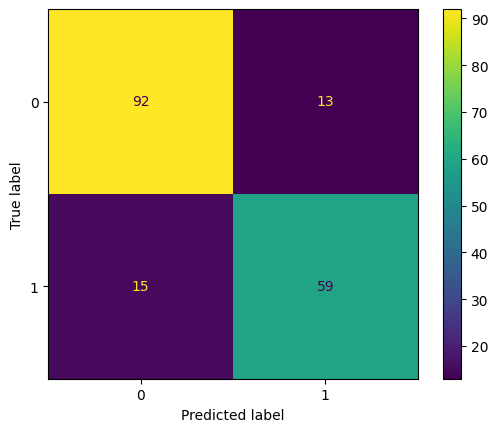

In [10]:
## View feature importance of holdout set model
## Evaluation holdout set

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

best_model = pipeline.set_params(**params)

# Initialize and train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Classification Report:\n{class_report}')

# Confusion Matrix
import matplotlib.pyplot as plt 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Basic Feature Importance Visualisation with Single Decision Tree 

# Formatting

In [35]:
submission = pd.DataFrame()
submission['Pred_Survived'] = best_model.predict(test_data).tolist()
submission['PassengerId']=test_data['PassengerId']
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pred_Survived  418 non-null    int64
 1   PassengerId    418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
